# Imports

In [32]:
import pandas as pd 
import seaborn 
import matplotlib.pyplot as plt 

# Data

In [59]:
predictions_clean_assis = pd.read_csv("Data/Intent Classification/Test Sets/predictions_clean_assis.tsv", sep="\t")
predictions_clean_autour = pd.read_csv("Data/Intent Classification/Test Sets/predictions_clean_autour.tsv", sep="\t")
predictions_clean_debout = pd.read_csv("Data/Intent Classification/Test Sets/predictions_clean_debout.tsv", sep="\t")
predictions_noise_assis = pd.read_csv("Data/Intent Classification/Test Sets/predictions_noise_assis.tsv", sep="\t")
predictions_noise_autour = pd.read_csv("Data/Intent Classification/Test Sets/predictions_noise_autour.tsv", sep="\t")
predictions_noise_debout = pd.read_csv("Data/Intent Classification/Test Sets/predictions_noise_debout.tsv", sep="\t")

# Visualisation

In [60]:
predictions_clean_assis["Prediction_Type"] = "clean_assis"
predictions_clean_autour["Prediction_Type"] = "clean_autour"
predictions_clean_debout["Prediction_Type"] = "clean_debout"
predictions_noise_assis["Prediction_Type"] = "noise_assis"
predictions_noise_autour["Prediction_Type"] = "noise_autour"
predictions_noise_debout["Prediction_Type"] = "noise_debout"

In [61]:
predictions = pd.concat([predictions_clean_assis,
                         predictions_clean_autour,
                         predictions_clean_debout,
                         predictions_noise_assis,
                         predictions_noise_autour,
                         predictions_noise_debout])

**Delete Wake words & Secondary Utterances**

In [68]:
for i, row in predictions.iterrows():
    if row['groundtruth'].lower().strip() in ["au secours","hey tuito","à l'aide","c'est urgent"]:
        predictions.drop(i, inplace=True)
predictions

groundtruth  \
4                                    arrêter   
5                        augmente le dossier   
7                           monte le dossier   
9                            augmente le lit   
10                            diminue le lit   
..                                       ...   
119         mettre le lit en position assise   
120        mettre le lit en position couchée   
121       mettre le lit en position allongée   
122  mettre le lit en position intermédiaire   
123        mettre le lit en position lecture   

                               transcription  \
4                                    arrêter   
5                        augmente le dossier   
7                           monte le dossier   
9                            augmente le lit   
10                            diminue le lit   
..                                       ...   
119          mettre le lit en position assis   
120        mettre le lit en position couchée   
121       mettre le lit en position allongée   
122  mettre le lit en position intermédiaire   
123        mettre le lit en position lecture   

                    transcription_with_front Prediction_Type  
4                                    arrêter     clean_assis  
5                        augmente le dossier     clean_assis  
7                           monte le dossier     clean_assis  
9                            augmente le lit     clean_assis  
10                            diminue le lit     clean_assis  
..                                       ...             ...  
119          mettre le lit en position assis    noise_debout  
120        mettre le lit en position couchée    noise_debout  
121       mettre le lit en position allongée    noise_debout  
122  mettre le lit en position intermédiaire    noise_debout  
123                       trente en position    noise_debout  

[699 rows x 4 columns]

In [73]:
predictions.to_csv("Data/Intent Classification/Test Sets/predictions_concat.tsv", sep="\t")

**ASR Predictions where the groundtruth is different than either transcription or transcription_with_front (or both)**

In [74]:
predict_diff = predictions[(predictions['groundtruth'] != predictions["transcription"]) | (predictions['groundtruth'] != predictions['transcription_with_front'])]
predict_diff.to_csv("Data/Intent Classification/Test Sets/predictions_diff.tsv", sep="\t")
predict_diff

groundtruth  \
31              mettre le lit en position lecture   
41                                  régler le lit   
52                     je souhaite régler mon lit   
53           mettre le dossier en position assise   
55   je souhaite régler le dossier à vingt degrés   
..                                            ...   
112                            augmente les pieds   
113                             diminue les pieds   
116               mettre le lit en position basse   
119              mettre le lit en position assise   
123             mettre le lit en position lecture   

                                     transcription  \
31               mettre le lit en position lecture   
41                                cinquante le lit   
52                   je souhaite régler en mon lit   
53         mettre le le dossier en position assise   
55   je souhaite mettre le dossier un vingt degrés   
..                                             ...   
112                             augmente les pieds   
113                                     le dossier   
116                   mettre lit en position basse   
119                mettre le lit en position assis   
123              mettre le lit en position lecture   

                         transcription_with_front Prediction_Type  
31             mettre  le lit en position lecture     clean_assis  
41                                  régler le lit     clean_assis  
52                     je souhaite régler mon lit     clean_assis  
53         mettre le le dossier en position assis     clean_assis  
55   je souhaite régler le dossier à vingt degrés     clean_assis  
..                                            ...             ...  
112                                augmente pieds    noise_debout  
113                             diminue les pieds    noise_debout  
116               mettre le lit en position basse    noise_debout  
119               mettre le lit en position assis    noise_debout  
123                            trente en position    noise_debout  

[213 rows x 4 columns]

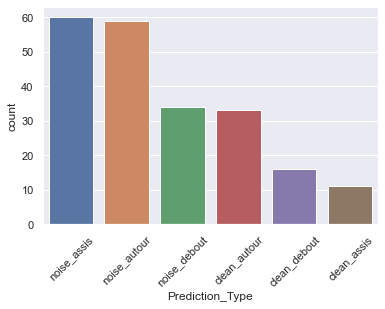

In [79]:
seaborn.set(font_scale=1.0)
seaborn.countplot(data=predict_diff, x='Prediction_Type', order=predict_diff.Prediction_Type.value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [109]:
mask = predict_diff['groundtruth'].apply(lambda x: len(x.split()) == 3)
pred_diff_mask = predict_diff[mask]
pred_diff_mask[pred_diff_mask['groundtruth'] != pred_diff_mask['transcription']]

groundtruth        transcription transcription_with_front  \
41          régler le lit     cinquante le lit            régler le lit   
41   descend le dossier\t   descend le dossier       descend le dossier   
102  augmenter le dossier  augmente le dossier      augmente le dossier   
103   diminuer le dossier   diminue le dossier       diminue le dossier   
104     monter le dossier     monte le dossier         monte le dossier   
..                    ...                  ...                      ...   
64      diminue les pieds           diminue le        diminue les pieds   
94          régler le lit                  NaN                      NaN   
108       augmente le lit             augmente          augmente le lit   
111        descend le lit                  NaN                      NaN   
113     diminue les pieds           le dossier        diminue les pieds   

    Prediction_Type  
41      clean_assis  
41     clean_autour  
102    clean_autour  
103    clean_autour  
104    clean_autour  
..              ...  
64     noise_debout  
94     noise_debout  
108    noise_debout  
111    noise_debout  
113    noise_debout  

[72 rows x 4 columns]